# Name

In [1]:
import json
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from lightkurve.lightcurve import LightCurve as LC
from lightkurve import TessTargetPixelFile

import eleanor

from bokeh.plotting import output_notebook, figure, show
from bokeh.models import HoverTool, tools,ColumnDataSource, Whisker, ColorBar, LinearColorMapper
from astropy.io import fits
output_notebook()



Loading BokehJS ...

In [2]:
name = ''
with open('response.json','r') as JSON:
    rdic = json.load(JSON)
sourcetess = rdic[name]

sourcetess['ra']
sourcecoord = "{} +{}".format(sourcetess['ra'],sourcetess['dec'])
print(sourcecoord)

lk.search_tesscut(sourcecoord)

291.1595 +59.696305555555554


SearchResult containing 5 data products.

        target_name          productFilename         description         distance
---------------------------- --------------- --------------------------- --------
291.1595 +59.696305555555554             n/a TESS FFI Cutout (sector 14)      0.0
291.1595 +59.696305555555554             n/a TESS FFI Cutout (sector 15)      0.0
291.1595 +59.696305555555554             n/a TESS FFI Cutout (sector 16)      0.0
291.1595 +59.696305555555554             n/a TESS FFI Cutout (sector 17)      0.0
291.1595 +59.696305555555554             n/a TESS FFI Cutout (sector 18)      0.0

In [3]:
sectornum = 14
#tpf = lk.search_tesscut(sourcecoord,sector=sectornum).download(cutout_size=11)


url = "https://mast.stsci.edu/tesscut/api/v0.1/astrocut?ra={ra}&dec={dec}&y=11&x=11&units=px&sector={sector}".format(ra=sourcetess['ra']
,dec=sourcetess['dec']
,sector=sectornum)
#tpf = lk.search_tesscut(sourcecoord,sector=sectornum).download(cutout_size=11)
response = urllib.request.urlretrieve(url,'TESSCUT.zip')
with ZipFile('TESSCUT.zip') as zipobj:
    zipobj.extractall()
    
for i in glob.glob('tess-s*.fits'):
    os.rename(i,'astrocut.fits')
    tpf = lk.TessTargetPixelFile('astrocut.fits')
    os.remove('astrocut.fits')
    os.remove('TESSCUT.zip')
    




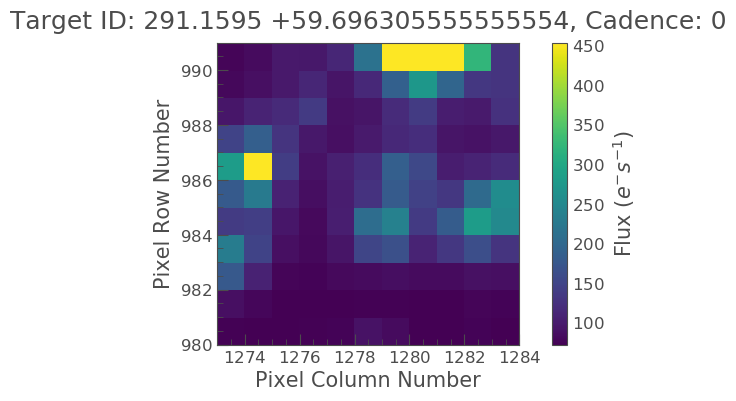

In [4]:
tpf.plot()

In [5]:
sourcelc = '{}Sector{}withBKLC.fits'.format(name,tpf.sector)
tpf.interact(notebook_url='localhost:8888',exported_filename=sourcelc)

In [6]:
tpf.interact_sky()

In [7]:
background_mask = ~tpf.create_threshold_mask(threshold=0.00001, reference_pixel=None)
#tpf.plot(aperture_mask=background_mask, mask_color='w');
n_background_pixels = background_mask.sum()
#print(n_background_pixels)

In [8]:
backgroundlc = '{}Sector{}BKLC.fits'.format(name,tpf.sector)

tpf.interact(notebook_url='localhost:8888',exported_filename=backgroundlc,aperture_mask=background_mask)

## Create a light-curve

Text(0.5, 1.0, 'KL Dra Sector 14')

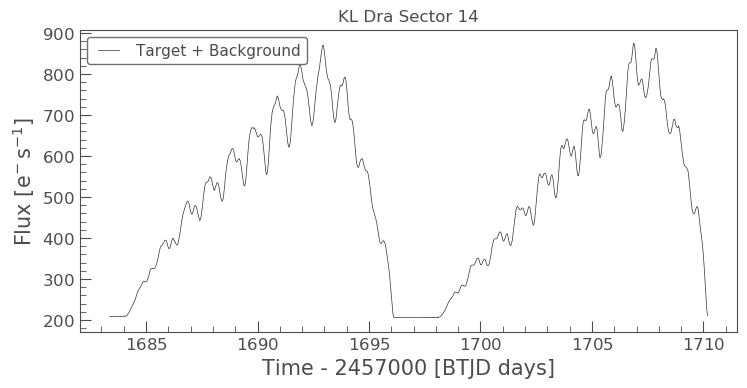

In [50]:
sourcemaskfits = fits.open(sourcelc)
sourcemask = sourcemaskfits[2].data
n_target_pixels = len(np.where(sourcemask==3)[0])

target_lc = tpf.to_lightcurve(aperture_mask=sourcemask)
target_lc.plot(label='Target + Background')
titleplot1 = '{} Sector {}'.format(name,sectornum)
plt.title(titleplot1)


## The amount of background seen in the target aperture is the background flux per pixel times the number of pixels in the target aperture.



In [51]:
backgroundmaskfits = fits.open(backgroundlc)
backgroundmask = backgroundmaskfits[2].data
n_background_pixels = len(np.where(backgroundmask==3)[0])
background_lc_per_pixel = tpf.to_lightcurve(aperture_mask=backgroundmask) / n_background_pixels
background_estimate_lc = background_lc_per_pixel * n_target_pixels

## nanpercentile 

Compute the qth percentile of the data along the specified axis, while ignoring nan values.

The second number is the percentile to compute, which must be between 0 and 100 inclusive.

If q is a single percentile and axis=None, then the result is a scalar.


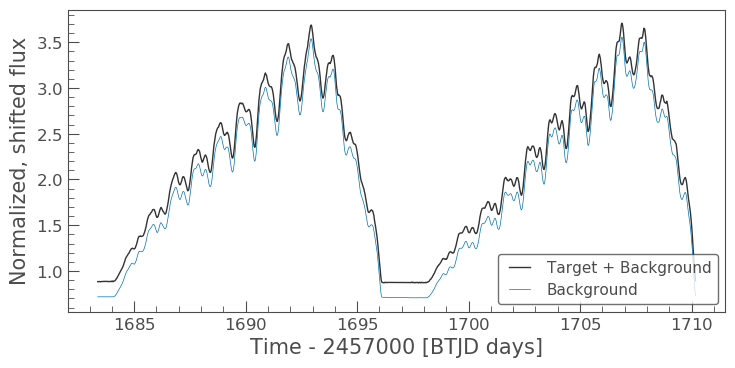

In [52]:
common_normalization = np.nanpercentile(target_lc.flux, 10)
ax = (target_lc / common_normalization).plot(normalize=False, label='Target + Background', lw=1);
(background_estimate_lc / common_normalization +0).plot(ax=ax, normalize=False, label='Background',
                                                        ylabel='Normalized, shifted flux');



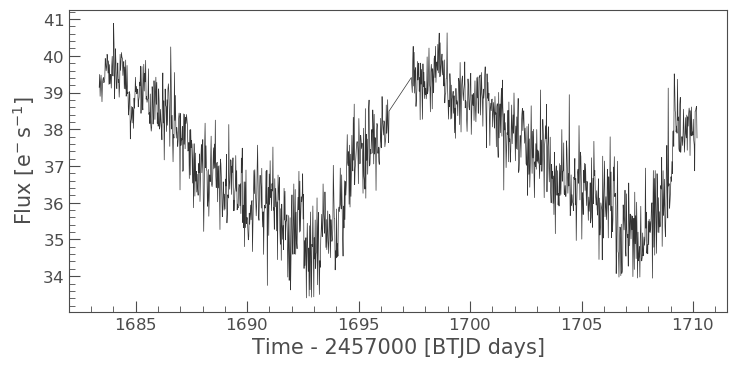

In [53]:
corrected_lc = target_lc - background_estimate_lc.flux
corrected_lc.plot();

# Removes the low frequency trend using scipy’s Savitzky-Golay filter.

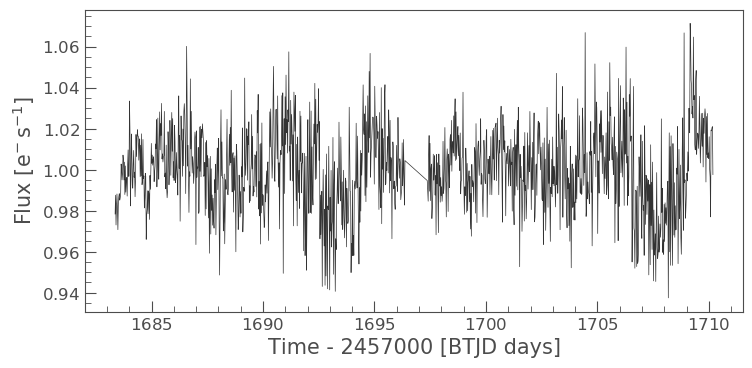

In [54]:
flat_lc = corrected_lc.flatten(window_length=401)
flat_lc.plot();



In [29]:
lcdic = {'time':flat_lc.time,
        "flatflux":flat_lc.flux}
source = ColumnDataSource(data=lcdic)

p = figure(plot_width=900, plot_height=500,title=titleplot1)
    

#Tool to get wavelength
hover2 = HoverTool(
        tooltips=[
            ('Date', '(@time{0,0.000})')
        ]
    )


p.add_tools(hover2)

p.line('time','flatflux',source=source)
show(p)

# Other Sector

In [2]:
sectornum = 15
tpf = lk.search_tesscut(sourcecoord,sector=sectornum).download(cutout_size=11)
tpf.plot()

NameError: name 'sourcecoord' is not defined

In [5]:
sourcelc = '{}Sector{}withBKLC.fits'.format(name,tpf.sector)
tpf.interact(notebook_url='localhost:8888',exported_filename=sourcelc)

In [6]:
tpf.interact_sky()

In [7]:
background_mask = ~tpf.create_threshold_mask(threshold=0.00001, reference_pixel=None)
#tpf.plot(aperture_mask=background_mask, mask_color='w');
n_background_pixels = background_mask.sum()
#print(n_background_pixels)
backgroundlc = '{}Sector{}BKLC.fits'.format(name,tpf.sector)

tpf.interact(notebook_url='localhost:8888',exported_filename=backgroundlc,aperture_mask=background_mask)

## Create a light-curve

Text(0.5, 1.0, 'KL Dra Sector 14')

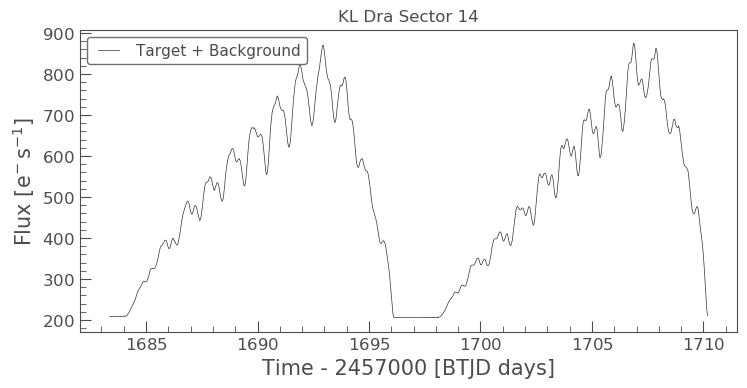

In [50]:
sourcemaskfits = fits.open(sourcelc)
sourcemask = sourcemaskfits[2].data
n_target_pixels = len(np.where(sourcemask==3)[0])

target_lc = tpf.to_lightcurve(aperture_mask=sourcemask)
target_lc.plot(label='Target + Background')
titleplot1 = '{} Sector {}'.format(name,sectornum)
plt.title(titleplot1)


#Backgorund
backgroundmaskfits = fits.open(backgroundlc)
backgroundmask = backgroundmaskfits[2].data
n_background_pixels = len(np.where(backgroundmask==3)[0])
background_lc_per_pixel = tpf.to_lightcurve(aperture_mask=backgroundmask) / n_background_pixels
background_estimate_lc = background_lc_per_pixel * n_target_pixels

# Substrtact background
common_normalization = np.nanpercentile(target_lc.flux, 10)
ax = (target_lc / common_normalization).plot(normalize=False, label='Target + Background', lw=1);
(background_estimate_lc / common_normalization +0).plot(ax=ax, normalize=False, label='Background',
                                                        ylabel='Normalized, shifted flux');


corrected_lc = target_lc - background_estimate_lc.flux
corrected_lc.plot(label='Target - BK');
plt.title('Target-BCK {} Sector {}'.format(name,sectornum))


#Remove low frequenbce
flat_lc = corrected_lc.flatten(window_length=401)
flat_lc.plot(label='Target-BK Flatten');
plt.title('Flatten {} Sector {}'.format(name,sectornum))



#Bokeh 
lcdic = {'time':flat_lc.time,
        "flatflux":flat_lc.flux}
source = ColumnDataSource(data=lcdic)

p = figure(plot_width=900, plot_height=500,title=titleplot1)
    

#Tool to get wavelength
hover2 = HoverTool(
        tooltips=[
            ('Date', '(@time{0,0.000})')
        ]
    )


p.add_tools(hover2)

p.line('time','flatflux',source=source)
show(p)


# Sector 14 with Eleanor

In [186]:
star = eleanor.Source(coords=(sourcetess['ra'],sourcetess['dec']), sector=sectornum, tc=True)
data = eleanor.TargetData(star,height=11, width=11)

/home/mmarcano/anaconda3/envs/eleanor/lib/python3.7/site-packages/eleanor/targetdata.py:383: UserWarning: WARNING: Making a TPF smaller than (9,9) may provide inadequate results.
  warnings.warn('WARNING: Making a TPF smaller than (9,9) may provide inadequate results.')
/home/mmarcano/anaconda3/envs/eleanor/lib/python3.7/site-packages/eleanor/targetdata.py:393: UserWarning: WARNING: Making a TPF smaller than (9,9) may provide inadequate results.
  warnings.warn('WARNING: Making a TPF smaller than (9,9) may provide inadequate results.')


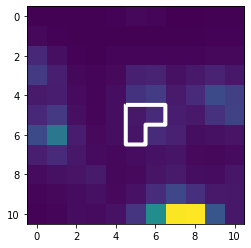

In [187]:
vis = eleanor.Visualize(data)
vis.aperture_contour()

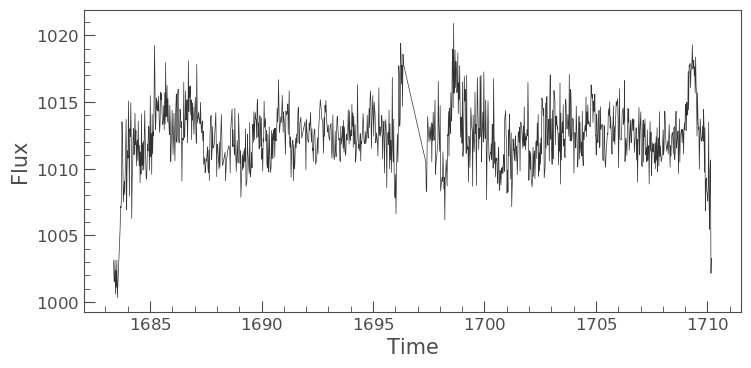

In [188]:
%matplotlib inline
q = data.quality == 0
lkeleanor = LC(data.time[q], data.corr_flux[q]).plot()

#Bokeh 
lcdic = {'time':data.time[q],
        "flatflux":data.corr_flux[q]}
source = ColumnDataSource(data=lcdic)

p = figure(plot_width=900, plot_height=500,title='Eleanor Target-BCK {} Sector {}'.format(name,sectornum))
    

#Tool to get wavelength
hover2 = HoverTool(
        tooltips=[
            ('Date', '(@time{0,0.000})')
        ]
    )


p.add_tools(hover2)

p.line('time','flatflux',source=source)
show(p)